#### Import Files

In [1]:
# Importing Files
import os
import random
import sys
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neural_network import MLPClassifier

%matplotlib inline

#### Reading the dataset

In [2]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

#### Understanding the fields

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# Data Distribution
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds)
print("The number of normal transactions( Class 0) are: ", No_of_normals)
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

The number of fraudulent transactions( Class 1) are:  492
The number of normal transactions( Class 0) are:  284315
Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [5]:
# Splitting into data and output columns
from sklearn.utils import shuffle
data = shuffle(data)
input_data = data.loc[:, :'Amount']
output_data = data.loc[:, 'Class':]

#### Breaking the data into training and test sets

In [6]:
# Number of records 
len(data)

284807

In [7]:
# Splitting 280000 into training and 4807 into testing
train_data = input_data.loc[:280000, :]
train_labels = output_data.loc[:280000, :]

test_data = input_data.loc[280000:, :]
test_labels = output_data.loc[280000:, :]

# Applying Classification without any preprocessing

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Creating the classifiers

In [9]:
clf_randomforest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [10]:
clf_neuralnet = MLPClassifier(alpha=1)

In [11]:
clf_knearest = KNeighborsClassifier(3)

#### Training the models

In [12]:
clf_randomforest.fit(train_data, np.ravel(train_labels))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
clf_neuralnet.fit(train_data, np.ravel(train_labels))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
clf_knearest.fit(train_data, np.ravel(train_labels))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Getting Scores

In [15]:
score_randomforest = clf_randomforest.score(test_data, test_labels)

In [16]:
score_neuralnet = clf_neuralnet.score(test_data, test_labels)

In [17]:
score_knearest = clf_knearest.score(test_data, test_labels)

In [18]:
print("Random Forest\t",end = "")
print(score_randomforest)

print("Neural Network\t", end="")
print(score_neuralnet)

print("K Nearest Neighbours\t", end="")
print(score_knearest)

Random Forest	0.9990763561532388
Neural Network	0.9975114259050992
K Nearest Neighbours	0.9982436409753296


In [19]:
unproc_res = [score_randomforest, score_neuralnet, score_knearest]

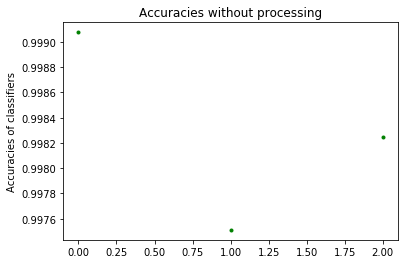

In [20]:
import matplotlib.pyplot as plt
plt.plot(unproc_res, '.g')
plt.ylabel('Accuracies of classifiers')
plt.title('Accuracies without processing')
plt.show()


# Applying different processing techniques for Handling Imbalanced Datasets

### 1. Undersampling

In [21]:
#list of fraud indices
fraud_index= np.array(data[data["Class"]==1].index)

#getting the list of normal indices from the full dataset
normal_index= data[data["Class"]==0].index

#choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)

# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= data.iloc[undersampled_indices, :]


In [22]:
len(undersampled_data)

984

In [30]:
sc= StandardScaler()
undersampled_data["scaled_Amount"]=  sc.fit_transform(undersampled_data.iloc[:,29].values.reshape(-1,1))
undersampled_data= undersampled_data.drop(["Time","Amount"], axis= 1)
X= undersampled_data.iloc[:, undersampled_data.columns != "Class"].values
y= undersampled_data.iloc[:, undersampled_data.columns == "Class"].values

from sklearn.utils import shuffle
X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)

ValueError: labels ['Time' 'Amount'] not contained in axis

In [31]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [32]:
clf_randomforest_hyb.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_pred = clf_randomforest_hyb.predict(X_test)
accuracies = cross_val_score(estimator = clf_randomforest_hyb, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

The mean accuracy in %:  99.8888888888889
The standard deviation in %  0.33333333333333215


E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


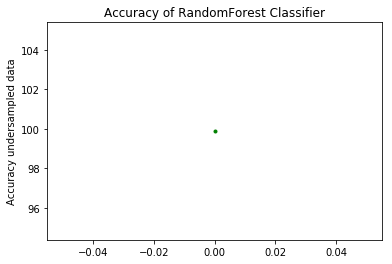

In [34]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy undersampled data')
plt.title('Accuracy of RandomForest Classifier')
plt.show()

#### Fitting Support Vector Classifier

In [35]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ValueError: The number of classes has to be greater than one; got 1

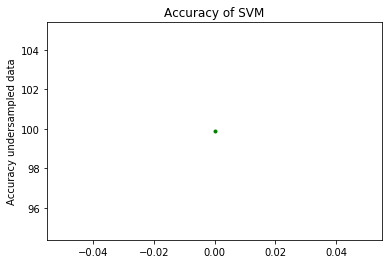

In [37]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy undersampled data')
plt.title('Accuracy of SVM')
plt.show()

### 2> Oversampling

In [38]:
len(data)

284807

In [39]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Sorting the data in descending order

In [40]:
res = data.sort_values('Class', ascending=[0])

In [41]:
res['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [42]:
# Adding 480 rows with fraud transactions to oversampled dataset
oversampled_data = res.iloc[:480, :]

In [43]:
res['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [44]:
# Picking 480 random incides from the random data
ind = random.sample(range(492, 284807), 480)

# Adding 480 rows of non-fraduenlent transactions
normal_transactions = res.iloc[ind , :]

In [45]:
total_data = pd.concat([oversampled_data, normal_transactions])
total_data['Class'].value_counts()

1    480
0    480
Name: Class, dtype: int64

#### Diving the dataset into input and output columns

In [46]:
X= total_data.iloc[:, total_data.columns != "Class"].values
y= total_data.iloc[:, total_data.columns == "Class"].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [48]:
sc= StandardScaler()

In [49]:
sc= StandardScaler()
total_data["scaled_Amount"]=  sc.fit_transform(total_data.iloc[:,29].values.reshape(-1,1))
#total_data= total_data.drop(["Time","Amount"], axis= 1)
X= total_data.iloc[:, total_data.columns != "Class"].values
y= total_data.iloc[:, total_data.columns == "Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

#### Random Forest

In [50]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [51]:
clf_randomforest_hyb.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
y_pred = clf_randomforest_hyb.predict(X_test)
accuracies = cross_val_score(estimator = clf_randomforest_hyb, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

The mean accuracy in %:  92.36036079490641
The standard deviation in %  3.1385400314432905


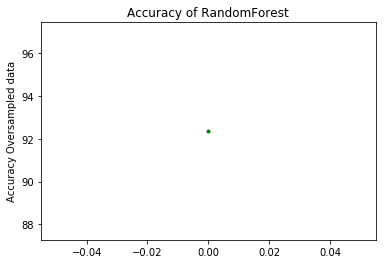

In [53]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy Oversampled data')
plt.title('Accuracy of RandomForest')
plt.show()

### Support Vector Classifier

In [54]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

The mean accuracy in %:  53.468577829228025
The standard deviation in %  2.0222997533285443


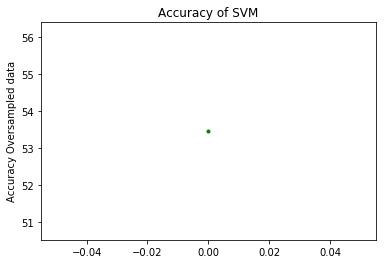

In [56]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy Oversampled data')
plt.title('Accuracy of SVM')
plt.show()

### 3> Synthetic Data Generation

In [57]:
res['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [58]:
minority_fit = res['Class'].iloc[:400]

#### Fitting in a linear regression equation, to get an equation of data

In [59]:
# Linear Regression
clf = MLPClassifier(alpha=1)

In [60]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.5083333333333333


E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
syn_data = clf.predict(X_test)

In [62]:
syn_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

#### Getting indices of the data, classified as 1 by the network

In [63]:
syn_indices = []

for i in range(len(syn_data)):
    if(syn_data[i] == 1):
        syn_indices.append(i)

#### Adding noise to the data

In [64]:
new_syn_data = []
for i in syn_indices:
    n = X_test[i] + (random.randint(-1, 1)) * 0.0005   
    n = np.insert(n, len(n), 1)
     
    new_syn_data.append(n)

### Output of the new synthetic data

In [65]:
new_syn_data

[array([ 4.24949995e+04,  8.74224428e-01, -8.24304098e-01,  8.37785321e-01,
         1.98372909e-01, -1.07830676e+00,  6.92534621e-02, -5.17689855e-01,
         1.02588482e-01,  5.45913042e-01, -1.92527363e-01,  9.54757557e-01,
         1.26683532e+00,  8.31749942e-01, -2.72020232e-01, -3.71454388e-02,
         6.45580573e-01, -6.58337435e-01,  4.34714802e-01,  2.94978708e-01,
         3.51992905e-01,  2.12470214e-01,  3.83045444e-01, -2.40286919e-01,
         1.22448581e-01,  1.86607436e-01,  1.09069027e+00, -6.79332900e-02,
         3.23978533e-02,  1.77999500e+02,  2.48713950e-01,  1.00000000e+00]),
 array([ 1.40730000e+04, -4.15301450e+00,  8.20479650e+00, -1.50317142e+01,
         1.03300998e+01, -3.99442610e+00, -3.25001318e+00, -1.04156978e+01,
         4.62080391e+00, -5.71124797e+00, -1.17971811e+01,  1.12779207e+01,
        -1.67283393e+01,  2.41367683e-01, -1.77216384e+01, -3.87299923e-01,
        -1.03220167e+01, -1.39590854e+01, -5.03071004e+00,  1.19726634e+00,
         1

### Hybrid Classification

### 1. Classifier Ensemble

#### A> On orignal data

In [66]:
# We use 3 classifiers for 3 different sections of data, training and testing
# Then we fit them all together using a Logistic Regression to give the final classification

In [67]:
# Number of rows for training
len(data)

284807

In [68]:

train_data_1 = input_data.loc[:100000, :]
train_labels_1 = output_data.loc[:100000, :]

test_data_1 = input_data.loc[280000:, :]
test_labels_1 = output_data.loc[280000:, :]


train_data_2 = input_data.loc[100000:200000, :]
train_labels_2 = output_data.loc[100000:200000, :]

test_data_2 = input_data.loc[280000:, :]
test_labels_2 = output_data.loc[280000:, :]



train_data_3 = input_data.loc[200000:280000, :]
train_labels_3 = output_data.loc[200000:280000, :]

test_data_3 = input_data.loc[280000:, :]
test_labels_3 = output_data.loc[280000:, :]



In [69]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [70]:
clf_neuralnet_hyb = MLPClassifier(alpha=1)

In [71]:
clf_knearest_hyb = KNeighborsClassifier(3)

#### Training the different classifiers

In [72]:
clf_randomforest_hyb.fit(train_data_1, np.ravel(train_labels_1))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
clf_neuralnet_hyb.fit(train_data_2, np.ravel(train_labels_2))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
clf_knearest_hyb.fit(train_data_2, np.ravel(train_labels_2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Predicting the different results

In [75]:
res1 = clf_randomforest_hyb.predict(test_data_1)
res2 = clf_neuralnet_hyb.predict(test_data_2)
res3 = clf_knearest_hyb.predict(test_data_3)

In [76]:
ar_1 = np.asarray(res1)
ar_1.shape

(208955,)

In [77]:
ar_2 = np.asarray(res2)
ar_2.shape

(208955,)

In [78]:
ar_3 = np.asarray(res3)
ar_3.shape

(208955,)

#### Training a logistic regression for this data to act as the final prediction

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
ensemble_train_data = np.column_stack((res1,res2,res3))
ensemble_train_data.shape

(208955, 3)

In [81]:
ensemble_train_labels = test_labels_1
ensemble_train_labels.shape

(208955, 1)

In [82]:
ensemble_train_subset = ensemble_train_data[:4600]
ensemble_train_subset.shape

(4600, 3)

In [83]:
ensemble_train_subset_labels = ensemble_train_labels[:4600]
ensemble_train_subset_labels.shape

(4600, 1)

In [84]:
ensemble_test_subset = ensemble_train_data[4600:]
ensemble_test_subset.shape

(204355, 3)

In [85]:
ensemble_test_subset_labels = ensemble_train_labels[4600:]
ensemble_test_subset_labels.shape

(204355, 1)

In [86]:
logreg = LogisticRegression(C=1e5)

In [87]:
logreg.fit(ensemble_train_subset, ensemble_train_subset_labels)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
final_res = logreg.predict(ensemble_test_subset)
len(final_res)

204355

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
acc_res = accuracy_score(ensemble_test_subset_labels, final_res)

In [91]:
print(acc_res)

0.9985613271023464


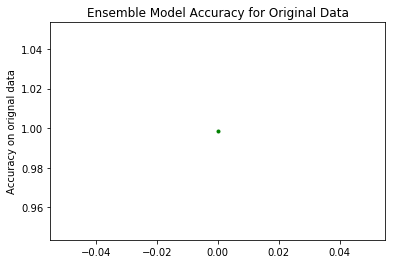

In [92]:
plt.plot(acc_res, '.g')
plt.ylabel('Accuracy on orignal data')
plt.title('Ensemble Model Accuracy for Original Data')
plt.show()

#### B> On Biased Sampling data 

In [93]:
newdata = res.iloc[:800]

In [94]:
from sklearn.utils import shuffle
newdata = shuffle(newdata)

In [95]:
new_output_data = newdata['Class'].iloc[:800]
len(new_output_data)

800

In [96]:
new_input_data = newdata.drop(['Class'], axis = 1)

In [97]:
new_input_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [98]:
len(new_output_data)

800

In [99]:
train_data_1 = new_input_data.iloc[:200]
train_labels_1 = new_output_data.iloc[:200]

test_data_1 = new_input_data.iloc[600:]
test_labels_1 = new_output_data.iloc[600:]


train_data_2 = new_input_data.iloc[200:400]
train_labels_2 = new_output_data.iloc[200:400]

test_data_2 = new_input_data.iloc[600:]
test_labels_2 = new_output_data.iloc[600:]



train_data_3 = new_input_data.iloc[400:600]
train_labels_3 = new_output_data.iloc[400:600]

test_data_3 = new_input_data.iloc[600:]
test_labels_3 = new_output_data.iloc[600:]


In [100]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [101]:
clf_neuralnet_hyb = MLPClassifier(alpha=1)

In [102]:
clf_knearest_hyb = KNeighborsClassifier(3)

In [103]:
clf_randomforest_hyb.fit(train_data_1, np.ravel(train_labels_1))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
clf_neuralnet_hyb.fit(train_data_2, np.ravel(train_labels_2))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [105]:
clf_knearest_hyb.fit(train_data_3, np.ravel(train_labels_3))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [106]:
res1 = clf_randomforest_hyb.predict(test_data_1)
res2 = clf_neuralnet_hyb.predict(test_data_2)
res3 = clf_knearest_hyb.predict(test_data_3)

In [107]:
ar_1 = np.asarray(res1)
ar_1.shape

(200,)

In [108]:
ar_2 = np.asarray(res2)
ar_2.shape

(200,)

In [109]:
ar_3 = np.asarray(res3)
ar_3.shape

(200,)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
ensemble_train_data = np.column_stack((res1,res2,res3))
ensemble_train_data.shape

(200, 3)

In [112]:
ensemble_train_labels = test_labels_1
ensemble_train_labels.shape

(200,)

In [113]:
ensemble_train_subset = ensemble_train_data[:200]
ensemble_train_subset.shape

(200, 3)

In [114]:
ensemble_train_subset_labels = ensemble_train_labels[:200]
ensemble_train_subset_labels.shape

(200,)

In [115]:
logreg = LogisticRegression(C=1e5)

In [116]:
logreg.fit(ensemble_train_subset, ensemble_train_subset_labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [117]:
ensemble_test_subset = ensemble_train_data[180:]
ensemble_test_subset.shape

(20, 3)

In [118]:
ensemble_test_subset_labels = ensemble_train_labels[180:]
ensemble_test_subset_labels.shape

(20,)

In [119]:
final_res = logreg.predict(ensemble_test_subset)
len(final_res)

20

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
acc_res = accuracy_score(ensemble_test_subset_labels, final_res)

In [122]:
print(acc_res)

0.95


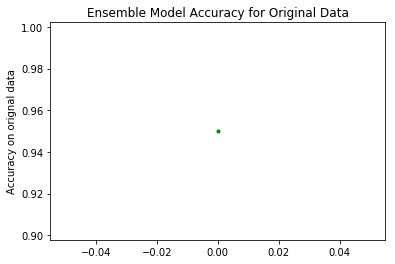

In [123]:
plt.plot(acc_res, '.g')
plt.ylabel('Accuracy on orignal data')
plt.title('Ensemble Model Accuracy for Original Data')
plt.show()

### Using Different Ensembles

#### Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_1 = gnb.fit(train_data_1, train_labels_1).predict(test_data_1)
#print("Number of mislabeled points out of a total %d points : %d"% (train_data_1.shape[0],(test_labels_1 != y_pred).sum()))

#### Linear SVM

In [125]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0)
clf.fit(train_data_2, train_labels_2)

y_pred_2 = clf.predict(test_data_2)

#### Ada Boost Classifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
clf = AdaBoostClassifier()

In [128]:
clf.fit(train_data_3, train_labels_3)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [129]:
y_pred_3 = clf.predict(test_data_3)

In [130]:
clf = LogisticRegression(C=1e5)

In [131]:
ensemble_train_data = np.column_stack((y_pred_1,y_pred_2,y_pred_3))
ensemble_train_data.shape

(200, 3)

In [132]:
ensemble_train_subset = ensemble_train_data[:200]
ensemble_train_subset.shape

(200, 3)

In [133]:
ensemble_train_labels = test_labels_1
ensemble_train_labels.shape

(200,)

In [134]:
clf.fit(ensemble_train_data, ensemble_train_labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [135]:
ensemble_test_subset = ensemble_train_data[180:]
ensemble_test_subset.shape

(20, 3)

In [136]:
ensemble_test_subset_labels = ensemble_train_labels[180:]
ensemble_test_subset_labels.shape

(20,)

In [137]:
final_res = clf.predict(ensemble_test_subset)
len(final_res)

20

In [138]:
acc_res = accuracy_score(ensemble_test_subset_labels, final_res)

In [139]:
print(acc_res)

0.85


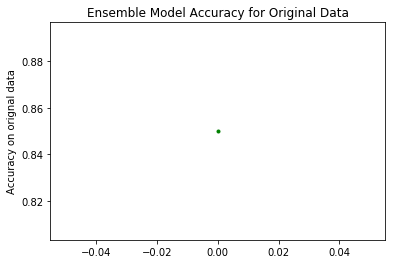

In [140]:
plt.plot(acc_res, '.g')
plt.ylabel('Accuracy on orignal data')
plt.title('Ensemble Model Accuracy for Original Data')
plt.show()